
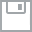
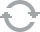
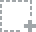
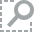
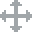
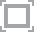
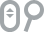
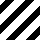
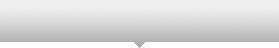
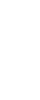
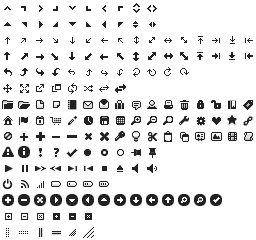
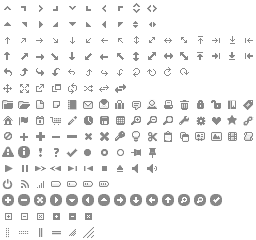
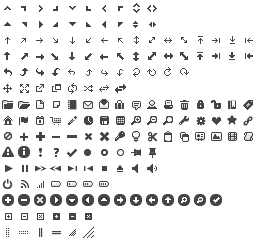
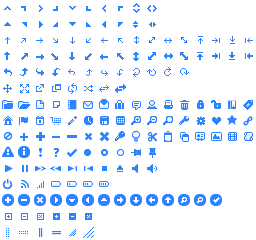
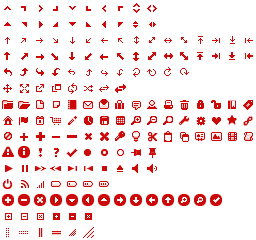
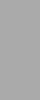
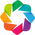
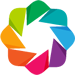

In [1]:
from IPython.display import Audio
from scipy.io import wavfile
import glob
import numpy
import h5py
import os
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
output_notebook()

In [2]:
base_path = '/Tmp/sotelo/data/merlin/blizzard/'
wav_path = base_path + 'wav/'
label_path = base_path +  'acoustic/label_phone_align/'
reg_label_path = base_path + 'acoustic/nn_no_silence_lab_norm_420/'
silence_pattern = '-sil+'
nin = 420

In [3]:
with open(base_path + 'file_id_list.scp') as f:
    files = f.readlines()
files = [x.strip() for x in files]

In [4]:
sample_file = 'CA-BB-01-07'
sample_wav = wav_path + sample_file + '.wav'
sample_label = label_path + sample_file + '.lab'

In [5]:
print sample_wav
print sample_label

/Tmp/sotelo/data/merlin/blizzard/wav/CA-BB-01-07.wav
/Tmp/sotelo/data/merlin/blizzard/acoustic/label_phone_align/CA-BB-01-07.lab


In [6]:
fs, wav_data = wavfile.read(sample_wav)
print "sampling rate: ", fs
print "length data: ", len(wav_data)
print "length in seconds: ", len(wav_data) / float(fs)
print "length in seconds/10000000: ", 10000000 * len(wav_data) / float(fs)

sampling rate:  16000
length data:  87872
length in seconds:  5.492
length in seconds/10000000:  54920000.0


In [7]:
with open(sample_label) as file:
    label_data = file.readlines()

print label_data[0]
print label_data[-1]

0 2500000 x^x-sil+dh=ax@x_x/A:0_0_0/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+2/D:0_0/E:x+x@x+x&x+x#x+x/F:det_1/G:0_0/H:x=x@1=1|0/I:26=21/J:26+21-1

52150000 53350000 ih^t-sil+x=x@x_x/A:1_1_2/B:x-x-x@x-x&x-x#x-x$x-x!x-x;x-x|x/C:0+0+0/D:content_1/E:x+x@x+x&x+x#x+x/F:0_0/G:26_21/H:x=x@1=1|0/I:0=0/J:26+21-1



In [8]:
print 100 * len(wav_data) / float(fs) - 5, int(label_data[-1].split(' ')[1]) / 100000, 100 * len(wav_data) / float(fs)
print 100 * len(wav_data) / float(fs) - 5 <= int(label_data[-1].split(' ')[1]) / 100000
print int(label_data[-1].split(' ')[1]) / 100000 <= 100 * len(wav_data) / float(fs)
print label_data[-1].split(' ')[1] == label_data[-1].split(' ')[1]

544.2 533 549.2
False
True
True


In [9]:
from io_funcs.binary_io import BinaryIOCollection
io_fun = BinaryIOCollection()
io_fun.load_binary_file(reg_label_path + sample_file + '.lab', nin).shape

(993, 420)

In [10]:
breaks_phone = [int(x.split(' ')[0]) for x in label_data] + [int(label_data[-1].split(' ')[1])]
breaks_phone = [x/625 for x in breaks_phone]
print breaks_phone

[0, 4000, 4800, 5280, 6800, 8960, 10480, 10720, 11120, 12560, 12800, 14720, 15920, 17200, 17520, 17760, 19600, 19760, 20880, 21520, 22880, 23680, 23920, 25600, 26960, 27920, 29440, 30640, 31200, 32160, 33200, 34640, 34960, 36240, 36480, 38800, 40880, 41920, 43920, 44320, 45760, 46080, 47040, 48480, 48960, 50720, 50960, 51920, 53520, 54240, 56160, 56320, 57200, 57600, 59440, 59680, 61920, 64480, 66000, 66400, 67120, 67840, 68320, 70080, 70320, 72080, 72880, 75040, 76080, 76480, 78720, 79520, 80320, 81520, 83440, 85360]


In [11]:
Audio(data=wav_data, rate = 16000)

In [12]:
fig = figure(width=1000, height=200)
fig.line(range(len(wav_data)), wav_data, line_width=1)

fig.ray(x=breaks_phone, y=-25000, length=30000, angle=90,
      angle_units="deg", color="#FB8072", line_width=2)

show(fig)

In [13]:
start = breaks_phone[1]
end = breaks_phone[-1-1]

In [14]:
wav_data = wav_data[start:end]
breaks_phone = [x - start for x in breaks_phone[1:-1]]

fig = figure(width=1000, height=200)
fig.line(range(len(wav_data)), wav_data, line_width=1)

fig.ray(x=breaks_phone, y=-25000, length=30000, angle=90,
      angle_units="deg", color="#FB8072", line_width=2)

show(fig)

In [15]:
def compare_lengths(sample_file):
    sample_wav = wav_path + sample_file + '.wav'
    sample_label = label_path + sample_file + '.lab'
    fs, wav_data = wavfile.read(sample_wav)
    
    with open(sample_label) as file:
        label_data = file.readlines()
    
    
    # print 100 * len(wav_data) / float(fs) - 5, int(label_data[-1].split(' ')[1]) / 100000, 100 * len(wav_data) / float(fs)
    # assert 100 * len(wav_data) / float(fs) - 5 <= int(label_data[-1].split(' ')[1]) / 100000
    assert int(label_data[-1].split(' ')[1]) / 100000 <= 100 * len(wav_data) / float(fs)

    sil_phone = [silence_pattern in x for x in label_data]
    
    assert sil_phone[0]
    assert sil_phone[-1]
    assert not numpy.any(sil_phone[1:-1])
    
    breaks_phone = [int(x.split(' ')[0]) for x in label_data] + [int(label_data[-1].split(' ')[1])]
    breaks_phone = [x/625 for x in breaks_phone]
    
    start = breaks_phone[1]
    end = breaks_phone[-1-1]
    wav_data = wav_data[start:end]
    return wav_data

In [16]:
all_wav_data = []
for idx, file in enumerate(files):
    if idx % 1000 == 0:
        print idx
    all_wav_data.append(compare_lengths(file))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [17]:
order = numpy.arange(len(all_wav_data))
numpy.random.seed(1)
numpy.random.shuffle(order)
print order[:10]

[1939 9594  685 2740 3595 3554 8886 2455 9442 6557]


In [18]:
all_wav_data = [all_wav_data[idx] for idx in order]

In [19]:
all_wav_data = numpy.array(all_wav_data)
numpy.save('/Tmp/sotelo/data/blizzard/all_blizzard.npy', all_wav_data)
numpy.save('/Tmp/sotelo/data/blizzard/blizzard_train.npy', all_wav_data[:8759])
numpy.save('/Tmp/sotelo/data/blizzard/blizzard_valid.npy', all_wav_data[8759:9245])
numpy.save('/Tmp/sotelo/data/blizzard/blizzard_test.npy', all_wav_data[9245:])

In [20]:
all_labels_data = []
for idx, file_name in enumerate(files):
    if idx % 1000 == 0:
        print idx
    all_labels_data.append(io_fun.load_binary_file(reg_label_path + file_name + '.lab', nin))
all_labels_data = [all_labels_data[idx] for idx in order]

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


In [21]:
all_labels_data = numpy.array(all_labels_data)
numpy.save('/Tmp/sotelo/data/blizzard/all_labels_blizzard.npy', all_labels_data)
numpy.save('/Tmp/sotelo/data/blizzard/blizzard_labels_train.npy', all_labels_data[:8759])
numpy.save('/Tmp/sotelo/data/blizzard/blizzard_labels_valid.npy', all_labels_data[8759:9245])
numpy.save('/Tmp/sotelo/data/blizzard/blizzard_labels_test.npy', all_labels_data[9245:])

In [56]:
len(all_labels_data[0])*80

161680

In [ ]:
len(all_wav_data[0])